In [43]:
#importing libraries

import random as rd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import rsa
import numpy as np


In [44]:
#declaring of varibles
numberOfExperts = 0
numberOfCandidates = 0


#Collection of rsa public and private keys for digital signature
dictOfrsaPubKey = {}
dictOfrsaPriKey = {}
marksToCandidates = []


In [45]:
def initVariables(E,C):
    global numberOfExperts, numberOfCandidates
    numberOfExperts, numberOfCandidates = E, C


In [46]:
#code to generate rsa public and private keys
def generateRSAKeys():
    global dictOfrsaPubKey, dicOfrsaPriKey
    for i in range(numberOfExperts):
        (pubkey, privkey) = rsa.newkeys(512)
        dictOfrsaPubKey[i],dictOfrsaPriKey[i] = pubkey, privkey 


In [47]:
# function to create digital signature
def createDigitalSignature(message,i):
    privkey = dictOfrsaPriKey[i]
    temp = str(message).encode()
    signature = rsa.sign(temp, privkey, 'SHA-1')
    return signature

In [48]:
#this part of the code finds the highest marks gaining candidate id this acts as the candidate manager for the first frame work
def candidateManagerFrameWork1BestCandidate():
    array  = []
    for i in range(len(marksToCandidates[0])):
        sum = 0
        for j in range(len(marksToCandidates)):
            sum = sum + marksToCandidates[j][i][0]
        # print(sum)
        array.append(sum)
    return array


In [49]:
def employerSelectsBestCandidate(array):
    print(array.index(max(array)))

In [50]:
#this part of the code defines the first frame work
def expertFunctionToGiveMarks():
    global marksToCandidates
    marksToCandidates = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = rd.randint(0,10)
            marksToCandidates[i][j] = [mark,createDigitalSignature(mark,i)]


In [51]:
def plotGraph(a,b):
    plt.plot(a,b,marker = "*")
    plt.xlabel("numberOfExperts")
    plt.ylabel("timeConsumed")
    plt.show()

In [52]:
def runSimulation(experts,candidates,flag):
    experts = experts
    timeList = []
    candidates = candidates

    if flag == "candidates":
        for i in range(len(candidates)):
            start = timer()
            initVariables(experts,candidates[i])
            generateRSAKeys()
            expertFunctionToGiveMarks()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            
            end = timer()
            timeList.append(end - start)
    else: 
        for i in range(len(experts)):
            start = timer()
            initVariables(experts[i],candidates)
            generateRSAKeys()
            expertFunctionToGiveMarks()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)

            
            end = timer()
            timeList.append(end - start)
    return (timeList)

In [53]:
#this part of the code run the simulation for defined number of times and helps us to calcuate average execution time
def averageTimeConsumedFunction(experts, candidates,flag):
    timeMatrix = []
    for i in range(0,50):
        timeList= runSimulation(experts, candidates,flag)
        timeMatrix.append(timeList)
    print(timeMatrix)        
    arr = np.array(timeMatrix, dtype='float32')
    print(arr)
    columns_average = arr.mean(axis=0)

    if flag == "candidates":
        plt.title("number of experts " + str(experts) )
        plt.xlabel("number Of Candidates")
        plt.ylabel("Average Execution Time")   
        plt.bar(candidates, columns_average)
        plt.show()
    else :
        plt.title("number of candidates " + str(candidates))
        plt.xlabel("number Of Experts")
        plt.ylabel("Average Execution Time")   
        plt.bar(experts, columns_average)
        plt.show()
    
    return columns_average

        

In [54]:
def simulationHavingExpertsConstCandidatesVariable(experts, candidates,flag):
    column_average = averageTimeConsumedFunction(experts,candidates,flag)
    return candidates, column_average,experts
    

In [55]:
def simulationHavingExpertsvariableCandidatesConst(experts,candidates,flag):
    column_average = averageTimeConsumedFunction(experts,candidates,flag)
    return candidates,column_average,experts

4
8
3
13
3
6
1
8
0
13
7
13
6
19
5
10
12
12
10
1
6
6
5
15
0
14
19
2
16
0
11
14
18
1
13
5
2
13
9
18
4
14
9
2
4
16
13
9
0
0
5
3
14
13
2
4
10
9
2
15
19
3
13
10
2
9
4
16
9
13
15
19
5
8
2
11
15
17
6
9
8
3
6
17
15
5
16
5
14
18
9
19
17
0
9
16
0
4
12
2
12
3
15
5
18
2
5
16
11
6
13
7
2
2
13
6
16
2
11
4
1
0
4
4
1
4
8
1
0
18
4
18
14
15
0
5
18
14
7
5
10
15
1
3
1
3
10
11
12
7
13
11
7
6
10
18
14
4
14
9
4
1
16
8
7
18
14
4
17
17
10
3
11
11
1
6
13
15
14
17
0
15
17
15
10
7
16
5
2
15
2
11
16
9
1
13
9
14
8
0
15
0
15
0
6
14
10
3
10
3
12
5
14
13
18
3
16
5
11
1
1
19
11
6
14
0
11
17
15
12
2
1
8
8
6
0
3
19
7
2
10
16
0
18
3
11
9
6
7
6
[[0.07099065700094798, 0.11866131900023902, 0.15731048799716518, 0.20822526999836555, 0.22933330800151452], [0.0377959550023661, 0.1640387389998068, 0.2397871440007293, 0.3514645639988885, 0.33982661299887695], [0.05176820700216922, 0.14581309400091413, 0.11936807600068278, 0.216841151999688, 0.2951794360014901], [0.07556544899853179, 0.21699462499964284, 0.1786633459996665, 0.23143

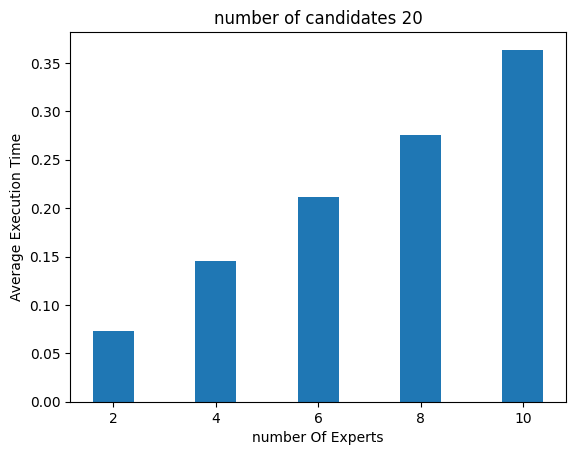

(20,
 array([0.07306325, 0.14488296, 0.21149677, 0.27537054, 0.36361447],
       dtype=float32),
 [2, 4, 6, 8, 10])

In [56]:

simulationHavingExpertsvariableCandidatesConst([2,4,6,8,10],20,"experts")

9
14
28
22
41
3
6
9
17
18
3
18
23
26
20
1
10
1
35
6
7
2
24
22
14
7
4
15
20
18
1
19
3
24
46
6
6
24
9
13
5
2
27
33
29
0
16
6
8
17
4
18
3
28
33
1
0
4
1
42
0
11
8
23
9
1
3
2
20
24
9
15
14
1
32
1
1
14
23
26
5
6
13
27
27
8
2
23
0
2
1
15
28
24
47
5
3
13
13
6
6
7
8
21
26
2
5
8
35
19
7
3
17
38
33
5
12
24
22
49
1
2
6
38
37
2
19
0
9
36
5
14
17
17
34
2
15
6
20
28
5
15
12
37
31
6
12
20
22
0
2
5
2
3
33
2
4
23
23
33
0
16
20
18
13
3
16
10
33
39
9
12
9
33
32
9
0
24
31
2
4
16
23
21
13
0
7
15
38
8
9
16
3
9
6
2
4
20
29
20
3
1
10
4
42
4
11
26
20
24
5
15
17
39
18
2
7
27
26
1
1
0
7
22
5
3
17
4
11
49
2
4
9
4
39
3
3
18
19
14
0
1
23
19
10
6
8
7
4
13
[[0.17358781499933684, 0.0935579310025787, 0.17043822800042108, 0.19125444800010882, 0.2685703539973474], [0.1671173880022252, 0.2529023570023128, 0.16365399100322975, 0.3422438159977901, 0.26054800800193334], [0.17252933199779363, 0.18971943199721863, 0.17858562500259723, 0.2510947690025205, 0.23818844000197714], [0.14231687099891133, 0.15324338099890156, 0.2860736

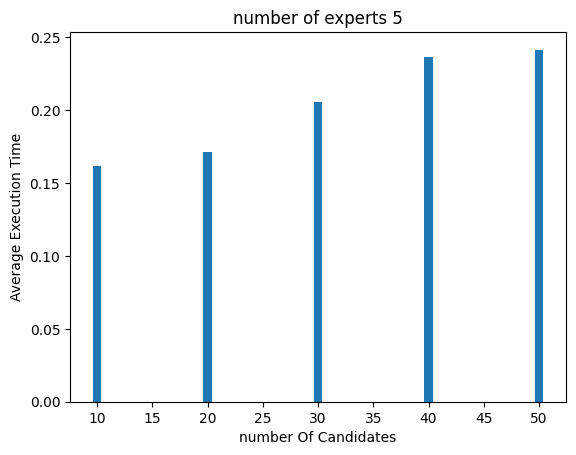

([10, 20, 30, 40, 50],
 array([0.16193055, 0.17168921, 0.20560484, 0.2363748 , 0.24157463],
       dtype=float32),
 5)

In [57]:
simulationHavingExpertsConstCandidatesVariable(5,[10,20,30,40,50],"candidates")